In [9]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Mouna\Desktop\Masters\Spring2019\Project Work\irma_coded_tweets.csv',dtype='str',encoding='utf-8',error_bad_lines=False,keep_default_na=False)
df['t']=df['tweet'].str.replace('http\S+|www.\S+', '', case=False)
df['t'] = df['t'].str.replace('@', ' ')
df['t'] = df['t'].str.replace('#', ' ')
df['t']=df['t'].str.lower()
from textblob import TextBlob
def split_into_lemmas(message):
    #message=message.lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]
df['t']=df['t'].apply(split_into_lemmas)

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stop = stopwords.words('english')
stemmer = SnowballStemmer("english")
df['t']=df['t'].apply(lambda x: [item for item in x if item not in stop])
df['t'] = df['t'].apply(lambda x: [stemmer.stem(y) for y in x])
df['len']=df['t'].str.len()
df.drop(df[df['len']<=2].index,inplace=True)
tweets = df['t'].tolist()
tweets = [[i for i in nested if len(i) > 2] for nested in tweets]

In [10]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.phrases import Phrases, Phraser
from gensim import corpora, models , similarities
import gensim
def bigrams(words, bi_min=10, tri_min=10):
    bigram = Phrases(words, min_count = bi_min)
    bigram_mod = Phraser(bigram)
    return bigram_mod
    
def get_corpus(df):
    words=df
    bigram_mod = bigrams(words)
    bigram = [bigram_mod[review] for review in words]
    id2word = corpora.Dictionary(bigram)
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

train_corpus, train_id2word, bigram_train = get_corpus(tweets)

In [11]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=5, step=16):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    perplexity=[]
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        
        coherence_values.append(coherencemodel.get_coherence())
        perplexity.append(model.log_perplexity(corpus)) 

    return model_list, coherence_values,perplexity

C:\Users\Mouna\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


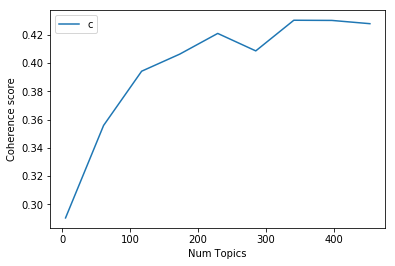

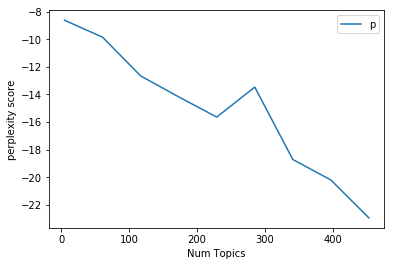

In [12]:
model_list, coherence_values,perplexity = compute_coherence_values(dictionary=train_id2word, corpus=train_corpus, texts=bigram_train, start=5, limit=500, step=56)
# Show graph
import matplotlib.pyplot as plt
limit=500; start=5; step=56;
x = range(start, limit, step)
plt.plot(x, coherence_values)
#plt.plot(x, perplexity)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
plt.plot(x, perplexity)
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [ ]:
from gensim.models import HdpModel
hdp = HdpModel(train_corpus, train_id2word)

In [28]:
hdp.print_topics(num_topics=300)

[(0,
  '0.002*irma + 0.002*florida + 0.002*hurricaneirma + 0.001*get + 0.001*hurrican + 0.001*hurrican_irma + 0.001*wind + 0.001*go + 0.001*come + 0.001*peopl'),
 (1,
  '0.002*irma + 0.002*florida + 0.002*hurricaneirma + 0.001*come + 0.001*hurrican + 0.001*go + 0.001*get + 0.001*storm + 0.001*ha + 0.001*keep'),
 (2,
  '0.002*irma + 0.001*florida + 0.001*hurricaneirma + 0.001*go + 0.001*hurrican + 0.001*like + 0.001*fuck + 0.001*get + 0.001*thesusieschaaf + 0.001*love'),
 (3,
  '0.001*irma + 0.001*hurricaneirma + 0.001*florida + 0.001*hurrican + 0.001*rain + 0.001*get + 0.001*go + 0.000*koriiclarkk + 0.000*watch + 0.000*amp'),
 (4,
  '0.002*irma + 0.001*florida + 0.001*hurricaneirma + 0.001*amp + 0.001*u + 0.001*still + 0.001*get + 0.001*ha + 0.001*say + 0.001*go'),
 (5,
  '0.001*florida + 0.001*irma + 0.001*hurricaneirma + 0.001*hurrican + 0.001*earthandcloud + 0.001*go + 0.001*get + 0.001*hurrican_irma + 0.000*u + 0.000*o-lin'),
 (6,
  '0.002*florida + 0.001*irma + 0.001*hurricaneirma

In [17]:
lda_model = gensim.models.ldamulticore.LdaMulticore(
                           corpus=train_corpus,
                           num_topics=150,
                           id2word=train_id2word,
                           workers=7, # Num. Processing Cores - 1
                           per_word_topics=True)

C:\Users\Mouna\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [20]:
lda_model.show_topics(num_topics=150)

[(0,
  '0.017*"power" + 0.012*"hurricaneirma" + 0.011*"report_gust" + 0.009*"includ" + 0.009*"tornado_warn" + 0.009*"edt" + 0.009*"gust_knot" + 0.009*"aso_report" + 0.008*"shore" + 0.008*"indian_river"'),
 (1,
  '0.020*"hurrican" + 0.017*"irma" + 0.013*"florida" + 0.009*"hurricaneirma" + 0.008*"wind" + 0.008*"stay_safe" + 0.007*"look" + 0.007*"got" + 0.006*"current_weather" + 0.006*"never"'),
 (2,
  '0.020*"florida" + 0.018*"get" + 0.014*"irma" + 0.011*"day" + 0.009*"hurrican" + 0.008*"tampa" + 0.007*"hurricaneirma" + 0.007*"fuck" + 0.006*"napl" + 0.006*"safe"'),
 (3,
  '0.033*"irma" + 0.012*"wait" + 0.011*"hurricaneirma" + 0.010*"hurrican" + 0.008*"like" + 0.008*"florida" + 0.007*"safe" + 0.007*"hurrican_irma" + 0.006*"come" + 0.006*"peopl"'),
 (4,
  '0.037*"irma" + 0.036*"hurricaneirma" + 0.023*"florida" + 0.011*"wind" + 0.009*"hurrican" + 0.009*"wait" + 0.008*"get" + 0.006*"weather" + 0.006*"god" + 0.005*"come"'),
 (5,
  '0.021*"irma" + 0.020*"amp" + 0.013*"hurrican" + 0.009*"hurric

In [21]:
lda_model.get_document_topics(train_corpus[0])

[(1, 0.39906985), (96, 0.51870793)]

In [22]:
lda_vectors=[]
for i in range(len(train_corpus)):
    top_topics=lda_model.get_document_topics(train_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(150)]
    lda_vectors.append(topic_vec)

In [24]:
lda_vectors[0][90:97]

[0.00055555557,
 0.00055555557,
 0.00055555557,
 0.00055555557,
 0.00055555557,
 0.00055555557,
 0.51766038]

In [25]:
import numpy as np
y=np.array(df.irma_rel)
X=np.array(lda_vectors)
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=2,test_size=0.2)
print(Xtrain.shape, Xtest.shape)

(13770, 150) (3443, 150)


In [ ]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(Xtrain,ytrain)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm_pred = clf.predict(Xtest)
print ("\n Confusion matrix \n", confusion_matrix(ytest, svm_pred))
print("\nClassification Report :: \n", classification_report(ytest, svm_pred))
print("Accuracy",accuracy_score(ytest, svm_pred))

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(Xtrain,ytrain)
y_pred = rf.predict(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print ("\n Confusion matrix \n", confusion_matrix(ytest, y_pred))
print("\nClassification Report :: \n", classification_report(ytest, y_pred))
print("Accuracy ",accuracy_score(ytest, y_pred))


 Confusion matrix 
 [[1153  664]
 [ 683  943]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.63      0.63      0.63      1817
          1       0.59      0.58      0.58      1626

avg / total       0.61      0.61      0.61      3443

Accuracy  0.608771420273


In [16]:
from xgboost import XGBClassifier
trained_model = XGBClassifier(n_estimators=300, learning_rate=0.3)
trained_model.fit(Xtrain,ytrain)
predictions = trained_model.predict(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print ("\n Confusion matrix \n", confusion_matrix(ytest, predictions))
print("\nClassification Report :: \n", classification_report(ytest, predictions))
print("Accuracy",accuracy_score(ytest, predictions))


 Confusion matrix 
 [[1043  774]
 [ 486 1140]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.68      0.57      0.62      1817
          1       0.60      0.70      0.64      1626

avg / total       0.64      0.63      0.63      3443

Accuracy 0.634040081324


#### Using tfidf instead of bigrams

In [88]:
model = models.TfidfModel(train_corpus)
corpus_tfidf = model[train_corpus]
lda_tfidf_model = gensim.models.ldamulticore.LdaMulticore(
                           corpus=corpus_tfidf,
                           num_topics=100,
                           id2word=train_id2word,
                           workers=7, # Num. Processing Cores - 1
                           per_word_topics=True)

C:\Users\Mouna\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [89]:
lda_tfidf_vectors=[]
for i in range(len(train_corpus)):
    top_topics=lda_tfidf_model.get_document_topics(corpus_tfidf[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(100)]
    lda_tfidf_vectors.append(topic_vec)

In [90]:
import numpy as np
y=np.array(df.irma_rel)
X=np.array(lda_tfidf_vectors)
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=2,test_size=0.2)
print(Xtrain.shape, Xtest.shape)

(13770, 100) (3443, 100)


In [91]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(Xtrain,ytrain)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm_pred = clf.predict(Xtest)
print ("\n Confusion matrix \n", confusion_matrix(ytest, svm_pred))
print("\nClassification Report :: \n", classification_report(ytest, svm_pred))
print("Accuracy",accuracy_score(ytest, svm_pred))


 Confusion matrix 
 [[1251  566]
 [1024  602]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.55      0.69      0.61      1817
          1       0.52      0.37      0.43      1626

avg / total       0.53      0.54      0.53      3443

Accuracy 0.538193435957


In [58]:
df.groupby('irma_rel').count()

,Unnamed: 0,timestamp,tweet_id,tweet,user_id,tweet_coords,tweet_coords_list,tweet_long,tweet_lat,location,enc_url,tweet_lang,hashtags,t,len
irma_rel,,,,,,,,,,,,,,,
0,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
1,8136,8136,8136,8136,8136,8136,8136,8136,8136,8136,8136,8136,8136,8136,8136


In [92]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(Xtrain,ytrain)
sgd_pred = sgd.predict(Xtest)
print ("\n Confusion matrix \n", confusion_matrix(ytest, sgd_pred))
print("\nClassification Report :: \n", classification_report(ytest, sgd_pred))
print("Accuracy",accuracy_score(ytest, sgd_pred))


 Confusion matrix 
 [[1011  806]
 [ 792  834]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.56      0.56      0.56      1817
          1       0.51      0.51      0.51      1626

avg / total       0.54      0.54      0.54      3443

Accuracy 0.535869880918


In [93]:
print(Xtrain.shape, ytrain.shape)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300, random_state = 42)
rf.fit(Xtrain,ytrain)
y_pred = rf.predict(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print ("\n Confusion matrix \n", confusion_matrix(ytest, y_pred))
print("\nClassification Report :: \n", classification_report(ytest, y_pred))
print("Accuracy ",accuracy_score(ytest, y_pred))

(13770, 100) (13770,)

 Confusion matrix 
 [[1157  660]
 [ 638  988]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.64      0.64      0.64      1817
          1       0.60      0.61      0.60      1626

avg / total       0.62      0.62      0.62      3443

Accuracy  0.623003194888


In [94]:
from xgboost import XGBClassifier
trained_model = XGBClassifier(n_estimators=300, learning_rate=0.3)
trained_model.fit(Xtrain,ytrain)
predictions = trained_model.predict(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print ("\n Confusion matrix \n", confusion_matrix(ytest, predictions))
print("\nClassification Report :: \n", classification_report(ytest, predictions))
print("Accuracy",accuracy_score(ytest, predictions))


 Confusion matrix 
 [[1090  727]
 [ 532 1094]]

Classification Report :: 
              precision    recall  f1-score   support

          0       0.67      0.60      0.63      1817
          1       0.60      0.67      0.63      1626

avg / total       0.64      0.63      0.63      3443

Accuracy 0.634330525704
